## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"]
duplicate_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
# check the mouse data for ID

duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data = duplicate_mouse_data.set_index("Mouse ID")
duplicate_mouse_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mice)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen


# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
means = clean_study_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
medians = clean_study_data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variances = clean_study_data_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
sds = clean_study_data_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sems = clean_study_data_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
summary_table = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Stdev.": sds,
    "Tumor Volume SEM":sems
    })

# Preview DataFrame
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg = clean_study_data_complete.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
})

summary_table_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

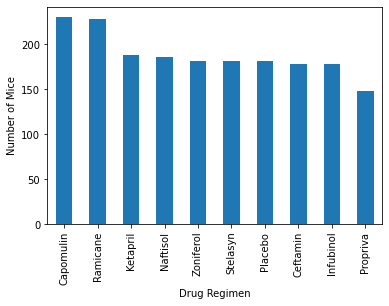

In [9]:
# Generate a bar plot that shows the total number of timepoints for all mice tested for each drug regimen throughout the course of the study using pandas
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

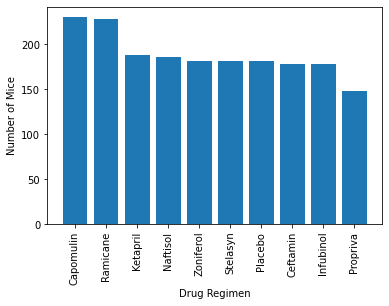

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(counts.index.values, counts.values)
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, 'Drug Regimen by Sex')

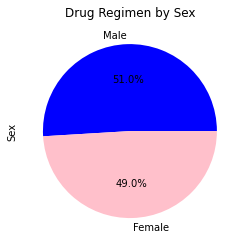

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_study_data_complete["Sex"].value_counts()
colors = ["blue", "pink"]
counts.plot(kind="pie", colors=colors, autopct="%1.1f%%")
plt.title("Drug Regimen by Sex")

Text(0, 0.5, 'Sex')

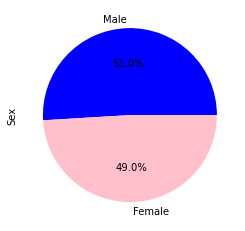

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, colors = colors, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_vol = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
last_tumor_vol = last_tumor_vol.reset_index()
last_tumor_vol

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_merge = last_tumor_vol.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
clean_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_merge.loc[clean_merge["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerbound) | (final_tumor_vol > upperbound)]
    

Text(0, 0.5, 'Tumor Volume (mm3)')

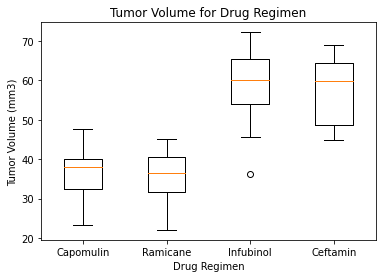

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drug_regimen)
plt.title("Tumor Volume for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

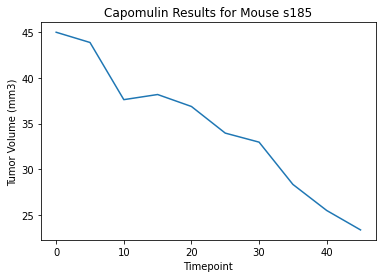

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
capomulin_table.head()

#remove other mouse IDs so only s185 shows
mouse_data = capomulin_table.loc[capomulin_table["Mouse ID"]=="s185"]
mouse_data

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin Results for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume Average')

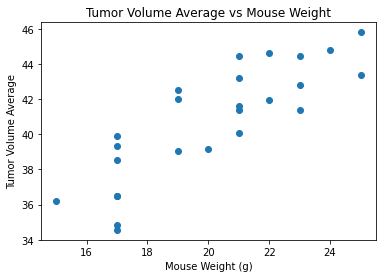

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
capomulin_average = capomulin_table.groupby("Mouse ID").mean()
capomulin_average

# produce scatter plot of the data
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.title("Tumor Volume Average vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


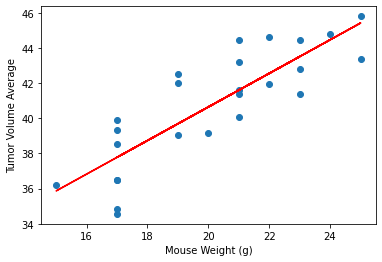

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0], 2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# establish linear regression values
model = st.linregress(capomulin_average["Weight (g)"],capomulin_average["Tumor Volume (mm3)"])

# linear regression line 
y_values = capomulin_average["Weight (g)"] * model[0] + model[1]

# scatter plot of the data
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")

# draw the line with the linear regression line on the plot
plt.plot(capomulin_average["Weight (g)"], y_values, color="red")

# Observations:

Capomulin seems to be the drug regimen that resulted in the lowest average tumor volume for participants

Infubinol was the only drug of the listed regimens that had significant outliers. 

There's a strong positive correlation between subject weight and tumor volume.